## data sets info

In [1]:
# house_data dataset

- id: Unique identifier for each property.
- date: Date when the property was sold.
- price: Sale price of the property.
- bedrooms: Number of bedrooms in the house.
- bathrooms: Number of bathrooms in the house.
- sqft_living: Square footage of the living area.
- sqft_lot: Square footage of the lot.
- floors: Number of floors in the house.
- waterfront: Indicates if the property has a waterfront view (binary: 0 = no, 1 = yes).
- view: Quality of the view from the property (numerical scale).
- condition: Condition of the house (numerical scale).
- grade: Overall grade based on building and design (numerical scale).
- sqft_above: Square footage of the house (excluding the basement).
- sqft_basement: Square footage of the basement.
- yr_built: Year the house was built.
- yr_renovated: Year the house was renovated (0 indicates no renovations).
- zipcode: ZIP code of the property.
- lat: Latitude coordinate of the property.
- long: Longitude coordinate of the property.
- sqft_living15: Average square footage of living area for the 15 nearest neighbors.
- sqft_lot15: Average square footage of lot size for the 15 nearest neighbors

## Import Libraries and Load Data
- Loaded the dataset and explored its structure. 
- Identified the target variable and potential features for linear regression.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [3]:
data = pd.read_csv('house_data.csv')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##  Data Preprocessing
- Handled missing values: (imputation, removal, etc.). 
- Explored and addressed outliers. 
- Checked for and handled any categorical features using encoding techniques

In [7]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

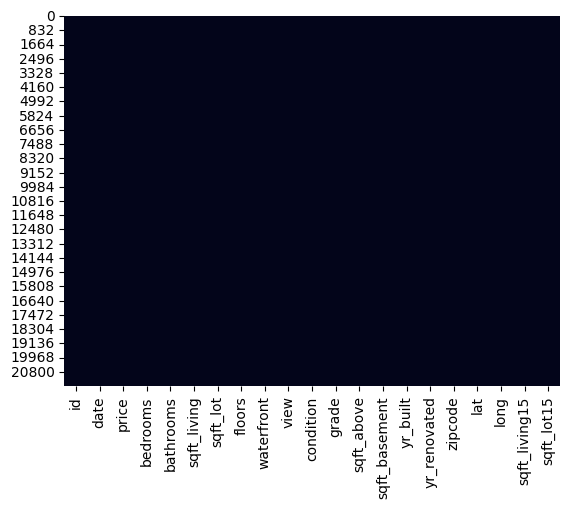

In [8]:
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [9]:
print("ID value counts:")
print(data['id'].value_counts())
print("\nDate value counts:")
print(data['date'].value_counts())
print("\nZipcode value counts:")
print(data['zipcode'].value_counts())

ID value counts:
id
795000620     3
2231500030    2
1237500540    2
6117501820    2
7853420110    2
             ..
8091400200    1
3814700200    1
1202000200    1
1794500383    1
2008000270    1
Name: count, Length: 21436, dtype: int64

Date value counts:
date
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20150131T000000      1
20150117T000000      1
20150308T000000      1
20150515T000000      1
20140803T000000      1
Name: count, Length: 372, dtype: int64

Zipcode value counts:
zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64


In [10]:
data.drop(columns=['id'], inplace=True)
data.drop(columns=['date'], inplace=True)
data.drop(columns=['zipcode'], inplace=True)

In [11]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

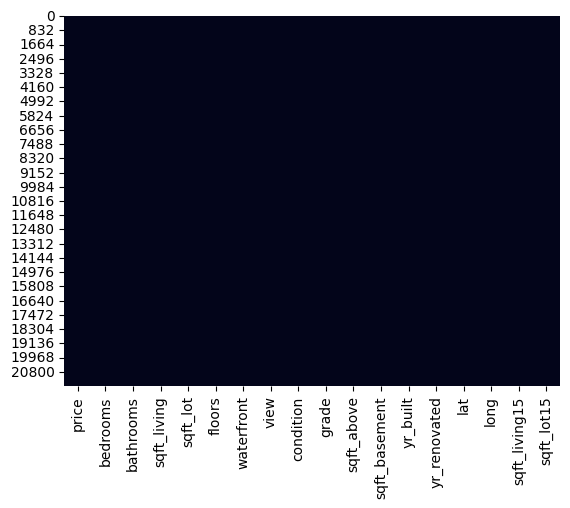

In [12]:
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [13]:
data.duplicated().sum()

np.int64(5)

In [14]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

## Outliers

In [15]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [16]:
fig = make_subplots(rows=1, cols=13)

fig.add_trace(go.Box(y=data["price"],name =' price'), row=1, col=1)
fig.add_trace(go.Box(y=data["bathrooms"],name =' bathrooms'), row=1, col=2)
fig.add_trace(go.Box(y=data["sqft_living"],name =' sqft_living'), row=1, col=3)
fig.add_trace(go.Box(y=data["sqft_lot"],name =' sqft_lot'), row=1, col=4)
fig.add_trace(go.Box(y=data["sqft_above"],name =' sqft_above'), row=1, col=5)
fig.add_trace(go.Box(y=data["sqft_basement"],name =' sqft_basement'), row=1, col=6)
fig.add_trace(go.Box(y=data["yr_built"],name =' yr_built'), row=1, col=7)
fig.add_trace(go.Box(y=data["yr_renovated"],name =' yr_renovated'), row=1, col=8)
fig.add_trace(go.Box(y=data["lat"],name =' lat'), row=1, col=9)
fig.add_trace(go.Box(y=data["long"],name =' long'), row=1, col=10)
fig.add_trace(go.Box(y=data["sqft_living15"],name =' sqft_living15'), row=1, col=11)
fig.add_trace(go.Box(y=data["sqft_lot15"],name =' sqft_lot15'), row=1, col=12)
fig.add_trace(go.Box(y=data["bedrooms"],name =' bedrooms'), row=1, col=13)

- some outliers i found important so i didnt remove them becuase it make sense

- and also when i used the IQR method some outliers make sense got removed so i used removed the outliers manual

In [17]:
data = data[(data['bedrooms'] >= 1) & (data['bedrooms'] <= 15)]
data = data[data['bathrooms'] > 0]
data = data[data['sqft_lot'] <= 200000]
data = data[data['sqft_living'] <= 10000]
data = data[data['sqft_above'] <= 8000]

In [18]:
fig = make_subplots(rows=1, cols=13)

fig.add_trace(go.Box(y=data["price"],name =' price'), row=1, col=1)
fig.add_trace(go.Box(y=data["bathrooms"],name =' bathrooms'), row=1, col=2)
fig.add_trace(go.Box(y=data["sqft_living"],name =' sqft_living'), row=1, col=3)
fig.add_trace(go.Box(y=data["sqft_lot"],name =' sqft_lot'), row=1, col=4)
fig.add_trace(go.Box(y=data["sqft_above"],name =' sqft_above'), row=1, col=5)
fig.add_trace(go.Box(y=data["sqft_basement"],name =' sqft_basement'), row=1, col=6)
fig.add_trace(go.Box(y=data["yr_built"],name =' yr_built'), row=1, col=7)
fig.add_trace(go.Box(y=data["yr_renovated"],name =' yr_renovated'), row=1, col=8)
fig.add_trace(go.Box(y=data["lat"],name =' lat'), row=1, col=9)
fig.add_trace(go.Box(y=data["long"],name =' long'), row=1, col=10)
fig.add_trace(go.Box(y=data["sqft_living15"],name =' sqft_living15'), row=1, col=11)
fig.add_trace(go.Box(y=data["sqft_lot15"],name =' sqft_lot15'), row=1, col=12)
fig.add_trace(go.Box(y=data["bedrooms"],name =' bedrooms'), row=1, col=13)





## Encoding

-  nothing to encode

In [19]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## Exploratory Data Analysis (EDA):
- Visualized the distribution of the target variable. 
- Examined the relationships between features and the target through pair plots.

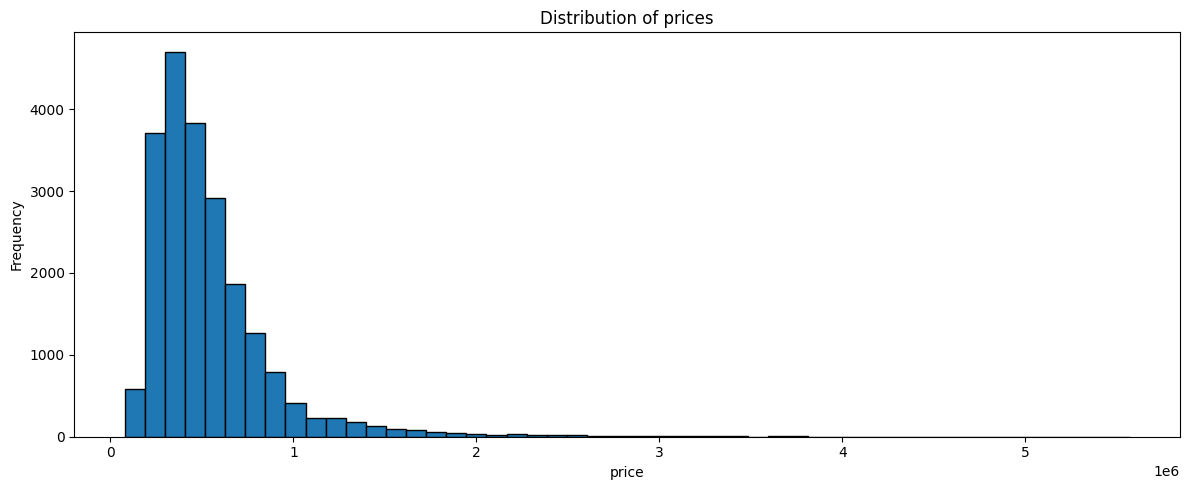

In [20]:
plt.figure(figsize=(12, 5))

plt.hist(data['price'], bins=50, edgecolor='black')
plt.title('Distribution of prices')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


- pairplot the whole data set is too large so i used a sample of it

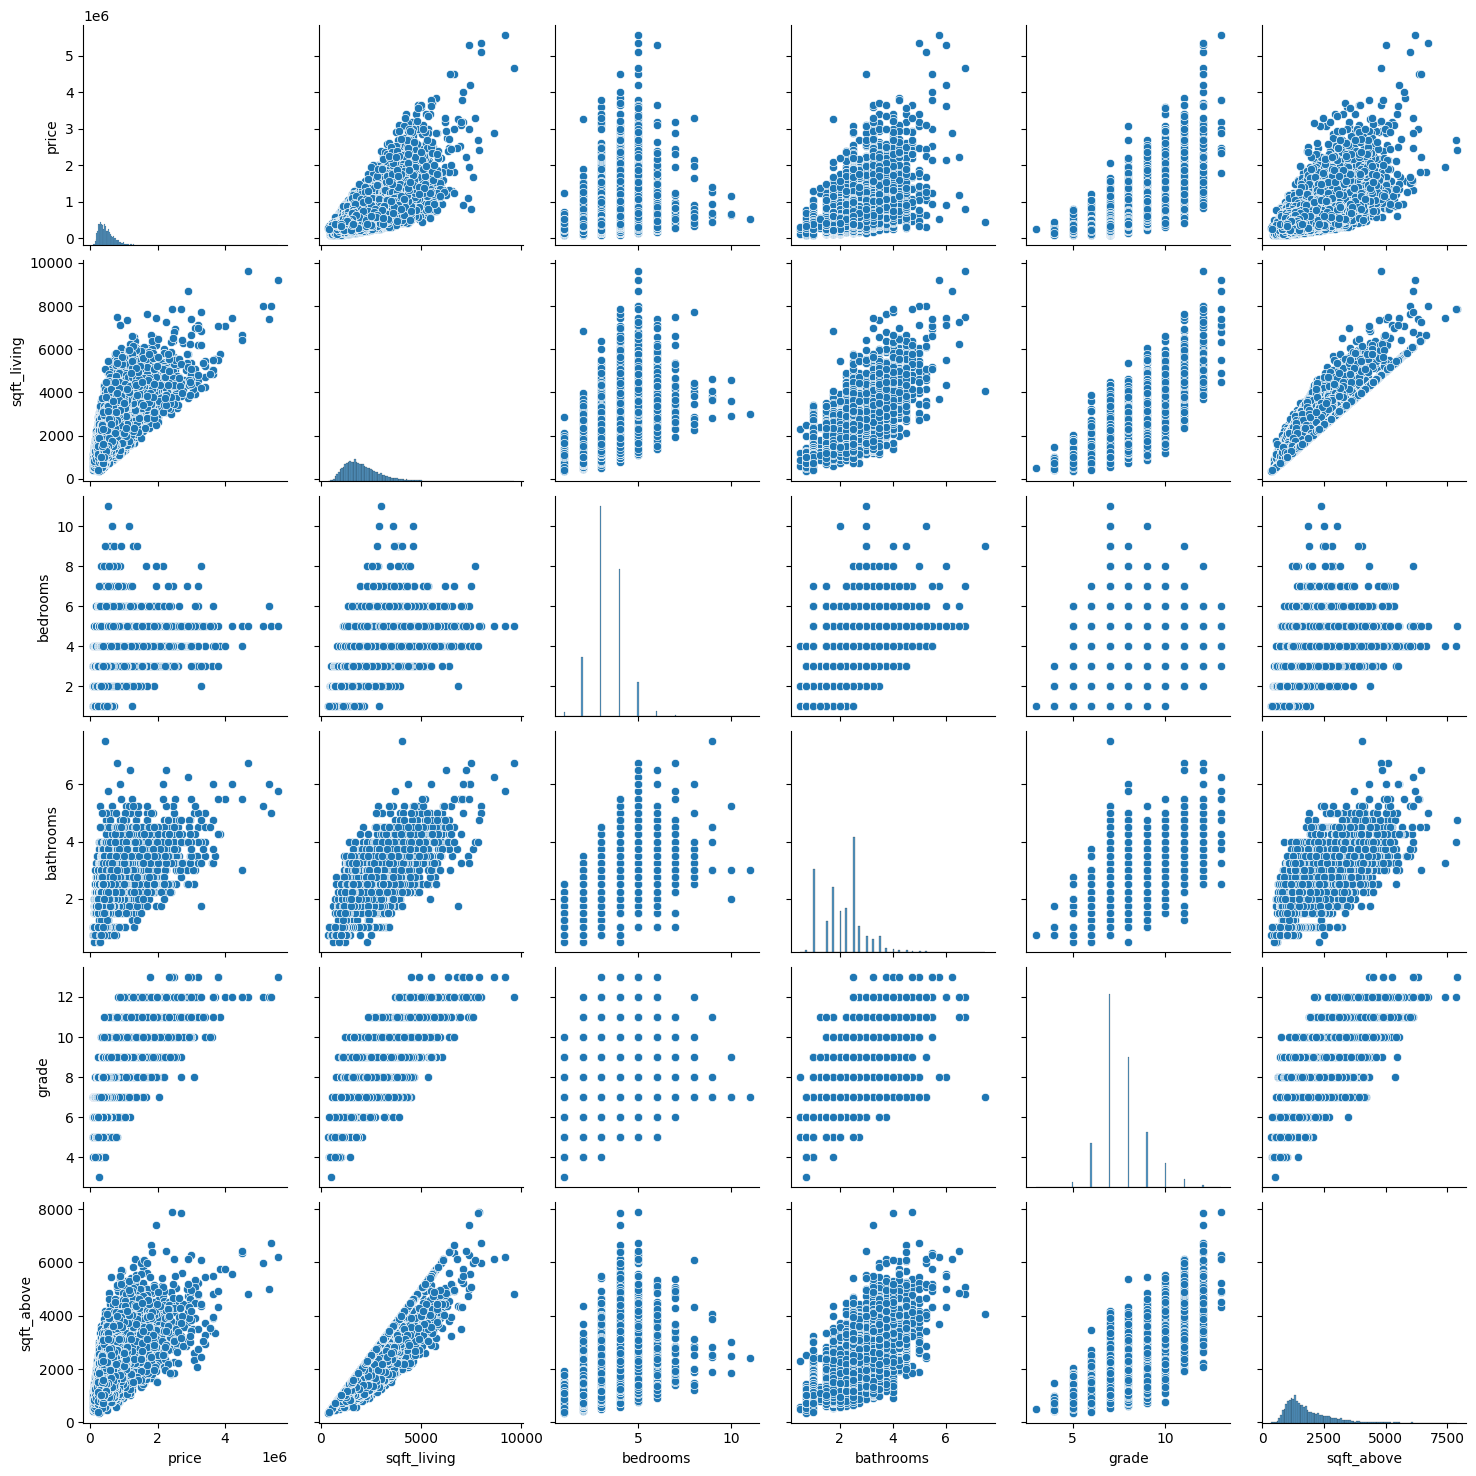

In [21]:
featuresplt = ['price','sqft_living','bedrooms','bathrooms','grade','sqft_above']
sns.pairplot(data[featuresplt], diag_kind='hist')
plt.show()

## Train-Test Split:
- Split the dataset into training and testing sets.

In [22]:
Features = data.drop(columns=['price'])
Target = data['price']

Features.shape, Target.shape

((21329, 17), (21329,))

In [23]:
x_train, x_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)


In [24]:
x_train.shape, y_train.shape

((17063, 17), (17063,))

In [25]:
x_test.shape, y_test.shape

((4266, 17), (4266,))

## Feature Scaling:
- Applied feature scaling to ensure that all features are on a similar scale

In [26]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
12975,2,1.00,780,10064,1.0,0,0,4,7,780,0,1958,0,47.4913,-122.318,1090,14750
16328,3,1.75,1435,8960,1.0,0,0,4,8,1435,0,1969,0,47.4525,-122.149,2030,9450
4905,3,1.00,1200,10080,1.0,0,0,4,7,1200,0,1969,0,47.3261,-122.135,1230,9800
18241,3,2.50,2310,53578,1.0,0,0,4,8,1340,970,1981,0,47.7677,-122.135,2660,49658
19291,3,2.00,1510,3817,1.5,0,0,3,8,1510,0,1905,1994,47.6088,-122.294,1510,3817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11434,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,47.2977,-122.367,1830,6956
12123,4,2.25,2350,8140,1.0,0,0,4,8,1430,920,1977,0,47.5579,-122.129,2640,8700
5464,3,1.00,1270,8400,1.0,0,0,3,7,1270,0,1955,0,47.7604,-122.198,1390,8400
870,3,1.75,1830,4160,1.0,0,0,3,7,1230,600,1919,0,47.5962,-122.288,1950,4160


In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
x_train

array([[-1.52663936, -1.46255857, -1.43782911, ..., -0.7312375 ,
        -1.30742309,  0.21793518],
       [-0.41561627, -0.47607878, -0.70784765, ...,  0.48802527,
         0.07473997, -0.08034434],
       [-0.41561627, -1.46255857, -0.9697494 , ...,  0.58902928,
        -1.10156902, -0.06064663],
       ...,
       [-0.41561627, -1.46255857, -0.89173611, ...,  0.13451121,
        -0.86630722, -0.13943745],
       [-0.41561627, -0.47607878, -0.26762983, ..., -0.51480032,
        -0.04289093, -0.37806106],
       [-0.41561627, -0.47607878, -0.27877459, ...,  1.70728804,
         0.86874853,  2.35412305]])

## Linear Regression Model:
- Built a linear regression model using a suitable library (e.g., scikit-learn). 
- Trained the model on the training dataset.

In [29]:
model =LinearRegression()

In [30]:
model.fit(x_train , y_train)

LinearRegression()

## Model Evaluation:
- Evaluated the model's performance on the testing set. 
- Used appropriate regression metrics (e.g., Mean Squared Error, R-squared). 

In [31]:
y_pred_train = model.predict(x_train)

print('MAE = ',mean_absolute_error(y_train , y_pred_train))
print('MSE = ',mean_squared_error(y_train , y_pred_train))
print('R2_Score = ',r2_score(y_train , y_pred_train))

MAE =  124110.38349169724
MSE =  38388879276.62813
R2_Score =  0.7017938026219076


In [32]:
y_pred_test = model.predict(x_test)

print('MAE = ',mean_absolute_error(y_test , y_pred_test))
print('MSE = ',mean_squared_error(y_test , y_pred_test))
print('R2_Score = ',r2_score(y_test , y_pred_test))

MAE =  125684.75734559806
MSE =  38170944621.52474
R2_Score =  0.693006991775185


# Visualization:
- Visualized the predicted values against the actual values using scatter plots.

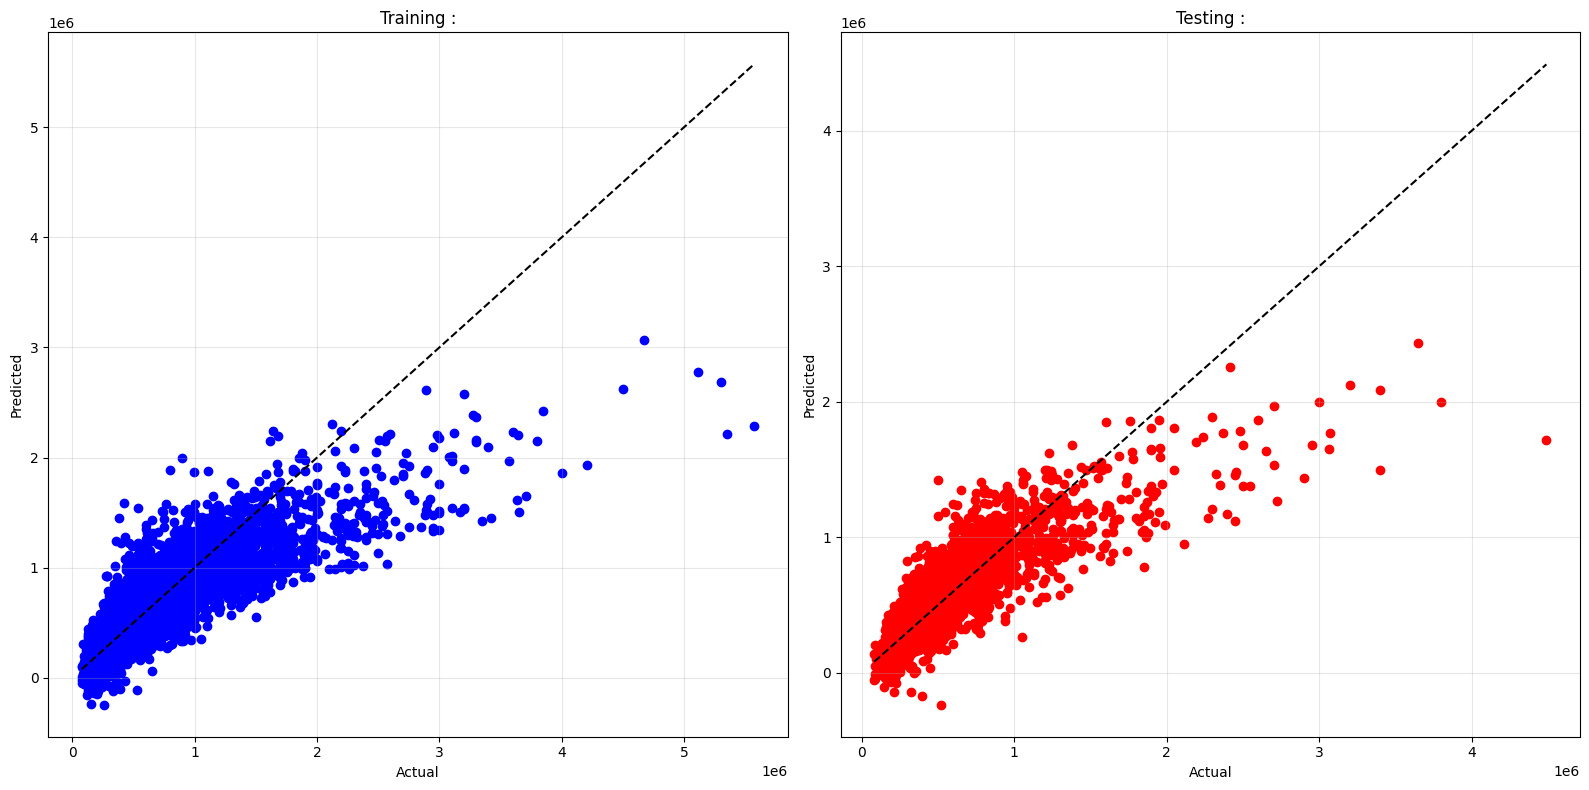

In [33]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue')
plt.title('Training :')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='red')
plt.title('Testing :')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Conclusion:
- Summarized the findings from the linear regression task. 
- Reflected on the model's performance and potential areas for improvement.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21329 non-null  float64
 1   bedrooms       21329 non-null  int64  
 2   bathrooms      21329 non-null  float64
 3   sqft_living    21329 non-null  int64  
 4   sqft_lot       21329 non-null  int64  
 5   floors         21329 non-null  float64
 6   waterfront     21329 non-null  int64  
 7   view           21329 non-null  int64  
 8   condition      21329 non-null  int64  
 9   grade          21329 non-null  int64  
 10  sqft_above     21329 non-null  int64  
 11  sqft_basement  21329 non-null  int64  
 12  yr_built       21329 non-null  int64  
 13  yr_renovated   21329 non-null  int64  
 14  lat            21329 non-null  float64
 15  long           21329 non-null  float64
 16  sqft_living15  21329 non-null  int64  
 17  sqft_lot15     21329 non-null  int64  
dtypes: float64(

In [35]:
print(f"MAE =  125684.75734559806")
print(f"MSE =  38170944621.52474")
print(f"R2_Score =  0.693006991775185")
print("R2_score of almost 70%")
print("17 features selected and 21612 records")
print("no missing values and also scaled using standard scaler")

MAE =  125684.75734559806
MSE =  38170944621.52474
R2_Score =  0.693006991775185
R2_score of almost 70%
17 features selected and 21612 records
no missing values and also scaled using standard scaler


In [36]:
print("we try to use regularization to prevent overfitting")
print("maybe add features like age of house becuase it matter and also if there is school and hospital near by")
print("we can also add neigbhborhood average price as a feature")
print("we can use polynomial regression to capture non-linear relationships with 3rd degree or 4th degree polynomials maybe")

we try to use regularization to prevent overfitting
maybe add features like age of house becuase it matter and also if there is school and hospital near by
we can also add neigbhborhood average price as a feature
we can use polynomial regression to capture non-linear relationships with 3rd degree or 4th degree polynomials maybe
